## <div align='center'>Лабораторная работа 5</div>


### <div align='center'>Вариант 22</div> 

<div align='right'>Гончаров Глеб</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.linalg import qr
from scipy.linalg import solve_triangular

#### Задание 5.1.22
Функция y=f(x) задана таблицей значений y , y ,...y в точках x , x ,...x . Используя метод 01n 01n
наименьшихквадратов(МНК),найтимногочлен Pm(x)=a +ax+...+a xm наилучшего 01m
среднеквадратичного приближения оптимальной степени m=m*. За оптимальное значение m* принять ту 1n2
 степень многочлена, начиная с которой величина σ = n − m (P (x ) − y ) стабилизируется m∑mkk
или начинает возрастать.
ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
k=0
1. Задать векторы x и y исходных данных.
2. Составить в явном виде нормальную систему метода наименьших квадратов и решить ее используя
стандартные средства линейной алгебры (см. напр. ПРИЛОЖЕНИЕ 5.В), найти многочлены Pm, m=0,1,2,..., по методу наименьших квадратов. Вычислить соответствующие им значения σ m .
3. Построить гистограмму зависимости σm от m, на основании которой выбрать оптимальную степень m*
многочлена наилучшего среднеквадратичного приближения.
4. На одном чертеже построить графики многочленов Pm, m=0,1,2,..., m*, и точечный график исходной функции. 5. (*) Решить задачу МНК используя QR или SVD разложение, не формируя матрицу левой части нормальной
системы в явном виде. Использовать стандартные библиотечные средства линейной алгебры для матричных разложений. Сравнить результаты полученные с помошью решения нормальной системы МНК и матричных разложений.


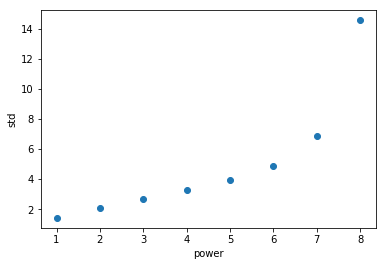

In [2]:
x = [-2, -1.67, -1.33, -1, -0.67, -0.33, 0, 0.33, 0.67, 1, 1.33, 1.67, 2]
y = [-4.596, -4.216, -3.162, -2.459, -1.558, -0.876, -0.168, 0.44, 1.715, 2.106, 2.845, 3.83, 4.634]
std = []
coef_matrix = []
m_max = 10
for i in range(2,m_max):
    a = np.zeros((len(x),i))
    for k in range(len(x)):
        for j in range(i):
            a[k][j] = x[k] ** j
    q, r = qr(a)
    coef = solve_triangular(r[:i,:],(np.transpose(q) @ y)[:i])
    coef_matrix.append(coef)
    for k in range(len(x)):
        s = 0 
        for j in range(len(coef)):
            s += (y[k] - coef[j] * x[k] ** j)**2
    s /= (len(x) - len(coef))
    std.append(s ** 0.5)
plt.scatter(range(1,m_max-1), std)
plt.xlabel('power')
plt.ylabel('std');

Ошибка начинает возрастать с первой степени

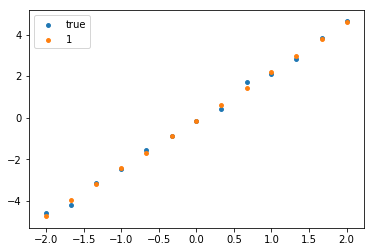

In [3]:
plt.scatter(x,y,s=15);
n = 3
for row in [coef_matrix[n - 1],]:
    y1 = []
    for dot in x:
        s = 0
        for power in range(len(row)):
            s += dot ** power * row[power]
        y1.append(s)
    plt.scatter(x,y1,s=15)

plt.legend(['true',*range(1,n+1)]);

### Задание 5.3.10
 Зависимость между величинами x и y описывается функцией y=f(x, a, b), где a и b – неизвестные параметры. Найти эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов. УКАЗАНИЕ. Свести исходную задачу к линейной задаче МНК можно, сделав подходящую замену переменных.
Например, если исходная зависимость имеет вид y = ea+bx2 , то прологарифмировав исходное равенство и введя новые переменные s = ln y и t = x2 , получаем задачу об определении коэффициентов линейной
зависимости s= a+b t.
    $$f = (ax + b)*cos(x)$$

Введем замену 
$$t_0 = x*cos(x), t_1 = cos(x)$$

In [4]:
s = '-1.0 0.756 -0.8 1.0033 -0.6 1.2215 -0.4 1.4 -0.2 1.5289 0 1.6 0.2 1.6073 0.4 1.5474 0.6 1.4196 0.8 1.2262 1.0 0.9725'
x = [float(x) for i,x in enumerate(s.split()) if i % 2 == 0]
y = [float(x) for i,x in enumerate(s.split()) if i % 2 == 1]
A = np.zeros((len(x), 2))
for i in range(len(x)):
    A[i,0] = x[i] * np.cos(x[i])
    A[i,1] = np.cos(x[i])
q, r = qr(A)
a,b = np.linalg.solve(r[:2,:],(np.transpose(q) @ y) [:2])

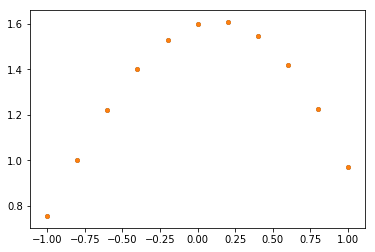

In [5]:
plt.scatter(x,y,s=15)
y1 = []
for i in x:
    y1.append((a*i +b) * np.cos(i))
plt.scatter(x,y1,s=15);

In [6]:
#проверим квадратичную ошибку
s = 0
for i in range(len(x)):
    s += (y[i] - (a*x[i] +b) * np.cos(x[i])) ** 2
s = s ** 0.5
s

0.0003982937640795689

## Задание 5.7.2
Задача 5.7. Дана кусочно-гладкая функция y=f(x). Сравнить качество приближения функции кусочно-линейной и глобальной интерполяциями.
ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Вычислить значения функции yi = f (xi ) в произвольных точках xi , i=0,1,..., k-1, отрезка [a, b], по
которым будет осуществляться интерполяция функции.
2. Составить программу-функцию, вычисляющую значение интерполяционного многочлена 1-ой степени по
точкам (xi,yi)и (xi+1,yi+1)впроизвольнойточкеотрезка [xi,xi+1].Сеепомощьювычислить
приближенные значения функции f(x) при кусочно-линейной интерполяции в 3k точках исходного отрезка [a,b]. 3. Вычислить приближенные значения функции f(x) в тех же 3k точках отрезка при глобальной интерполяции. Для этого составить функцию, выполняющею построение интерполяционного многочлена в форме Ньютона (см. напр. функцию inter, ПРИЛОЖЕНИЕ 5.B). На одном чертеже построить графики интерполирующих функций,
график исходной функции f(x), а также отметить точки (xi , yi ) , i=0,1,...,k-1, по которым осуществлялась
интерполяция.
4. Вычислить практическую величину погрешностей ∆ j , j=0,1,...,3k-1, приближения функции f(x) в 3k точках
для кусочно-линейной и глобальной интерполяций. На одном чертеже построить графики погрешностей. Сравнить качество приближения.
$$f(x) = \lvert{x^2 +x}\lvert$$
$$[a,b] = [-2,2]$$

In [7]:
def f(x):
    return x ** 2 + x

def linear(point, x, y):
    if point == x[0]:
        return y[0]
    i = 0
    while point > x[i]:
        i+=1
    return (y[i] - y[i-1]) / (x[i] - x[i-1]) * (point - x[i-1]) + y[i-1]

class Newton_polynom_solver:
    def __init__(self,x,y):
        self.dif_matrix = np.zeros((len(x),len(x)))
        self.x = x.copy()
        for i in range(len(x)):
            self.dif_matrix[i][0] = y[i]
        for k in range(1, len(x)):
            for i in range(len(x) - k):
                self.dif_matrix[i][k] = (self.dif_matrix[i+1][k-1] - self.dif_matrix[i][k-1]) / (x[i+k] - x[i])
                
    def solve(self, x0):
        s = 0
        for i in range(len(self.x)):
            temp = self.dif_matrix[0][i]
            for k in range(i):
                temp *= x0 - self.x[k]
            
            s += temp
        return s 

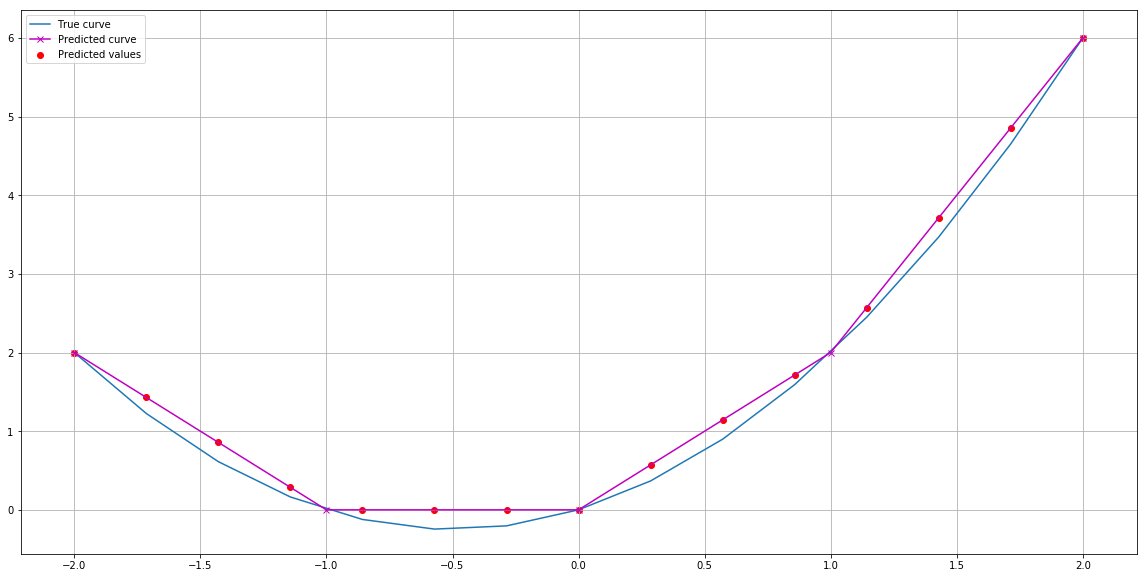

In [8]:
#Линейную мы построили
size = 5
x = np.linspace(-2,2,size)
y = x ** 2 + x
x3 = np.linspace(-2,2,3*size)
y3 = []
dis_linear = []
for i in x3:
    y_pred = linear(i,x,y)
    y3.append(y_pred)
    dis_linear.append (y_pred - f(i))
plt.figure(figsize=(20,10))
plt.plot(x3,f(np.array(x3)), label='True curve')
plt.scatter(x3,y3,color='r', label='Predicted values')
plt.plot(x,y,marker='x',color='m', label='Predicted curve')

plt.grid()
plt.legend();

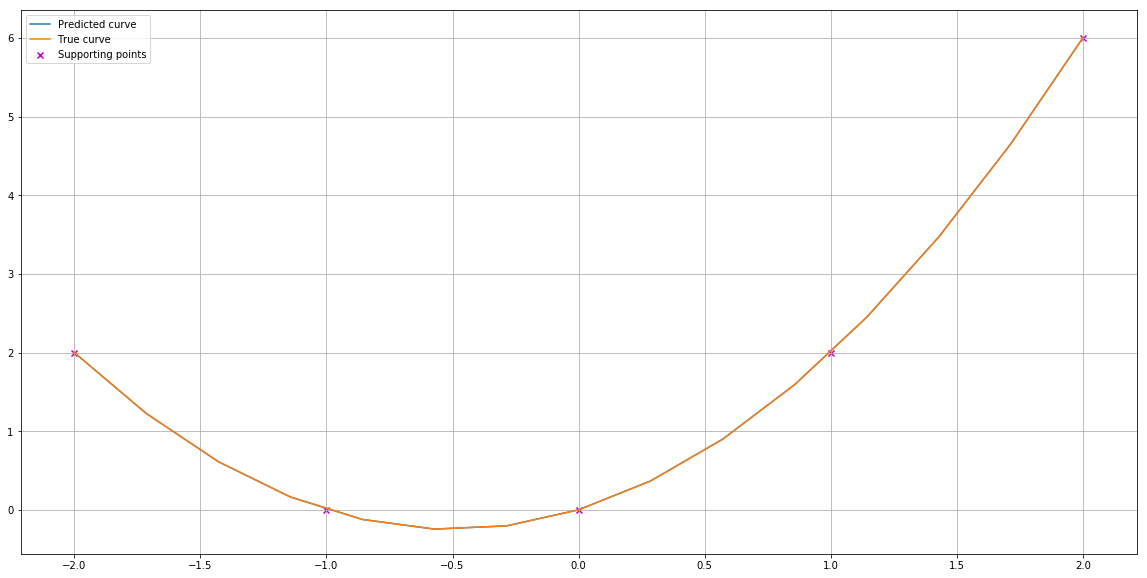

In [9]:
solver = Newton_polynom_solver(x,y)
x3 = np.linspace(-2,2,3*size)
y3 = []
dis_pol = []
for i in x3:
    y_pred = solver.solve(i)
    y3.append(y_pred)
    dis_pol.append(y_pred - f(i))
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(x3,y3, label='Predicted curve')
plt.scatter(x,y,marker='x',label ='Supporting points',color='m');
plt.plot(x3,f(x3),label ='True curve')
plt.legend();
#Прямые совпадают

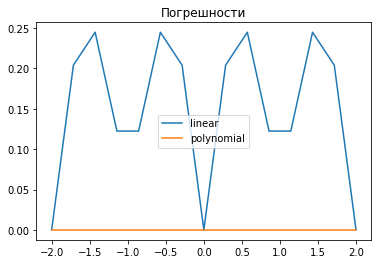

In [10]:
#Нарисуем погрешности
plt.plot(x3,dis_linear)
plt.plot(x3,dis_pol)
plt.legend(['linear','polynomial'])
plt.title("Погрешности");

### Задание 5.9.11
$$ f(x)=x^2cos(x)$$
$$[a,b]=[0,5]$$
Тип -  естественный

In [11]:
def fun(x):
    return np.cos(x) * x ** 2

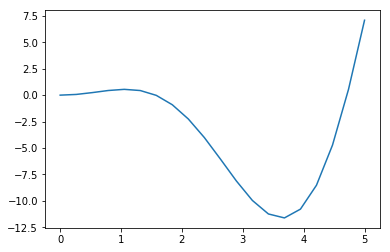

In [12]:
size = 20
x = np.linspace(0, 5, size)
y = fun(x)
plt.plot(x,y);

In [13]:
#натуральные сплайны (одинаковое расстроение между точками)
Y, dif = np.zeros(len(x)), np.zeros(len(x) - 1)
h = (x[1]-x[0])
A = np.eye(len(x)) * 4 / h + np.eye(len(x),k=1) / h + np.eye(len(x),k=-1) / h
A[0][0] = -2 / h
A[0][1] = -4 / h
A[-1][-2] = 2 / h
A[-1][-1] = 4 / h
for i in range(len(x)-1):
    dif[i] = y[i+1] - y[i]
for i in range(1, len(x)-1):
    Y[i] = 3 / h * (dif[i-1] + dif[i])
Y[0] = -6 / h * dif[0]
Y[-1] = 6 / h * dif[-1]
coef = np.linalg.solve(A,Y)

In [14]:
def return_spline(x,y,x0, coef):
    i = 0
    if x0 == x[-1]:
        return y[-1]
    while x0 > x[i]:
        i += 1
    h = x[i] - x[i-1]
    p_1 = y[i] * (x0 - x[i-1]) / h + y[i-1] * (x[i] - x0) / h
    m = (y[i] - y[i-1]) / h
    p_3 = (x0 - x[i-1]) * (x[i] - x0) / (h ** 2) *\
    ((m - coef[i]) * (x0 - x[i-1]) + (coef[i-1] - m) * (x[i] - x0))
    return p_1 + p_3

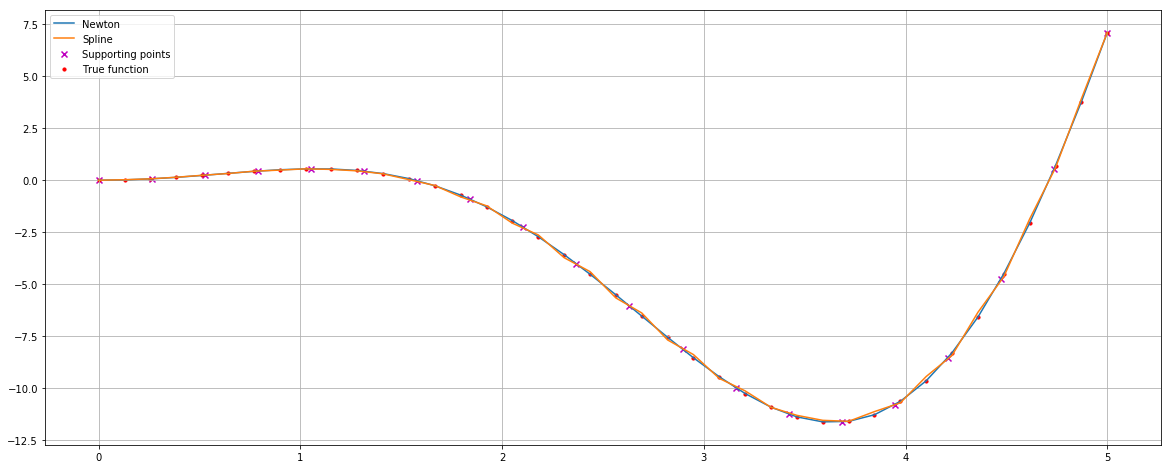

In [15]:
x_test = np.linspace(0,5, 2 * size)
dis_new, dis_spline = [], []
solver1 = Newton_polynom_solver(x,y)
y_test = []
plt.figure(figsize=(20,8))
for i in x_test:
    y_pred = solver1.solve(i)
    dis_new.append(fun(i) - y_pred)
    y_test.append(y_pred)
plt.plot(x_test,y_test, label = 'Newton');

y_test = []
for i in x_test:
    y_pred = return_spline(x,y,i,coef)
    y_test.append(y_pred)
    dis_spline.append(fun(i) - y_pred)
plt.plot(x_test, y_test, label = 'Spline');
plt.scatter(x,y,label='Supporting points', marker='x',color='m')
plt.scatter(x_test, fun(x_test),color='r',label='True function', s=10)
plt.legend()
plt.grid();

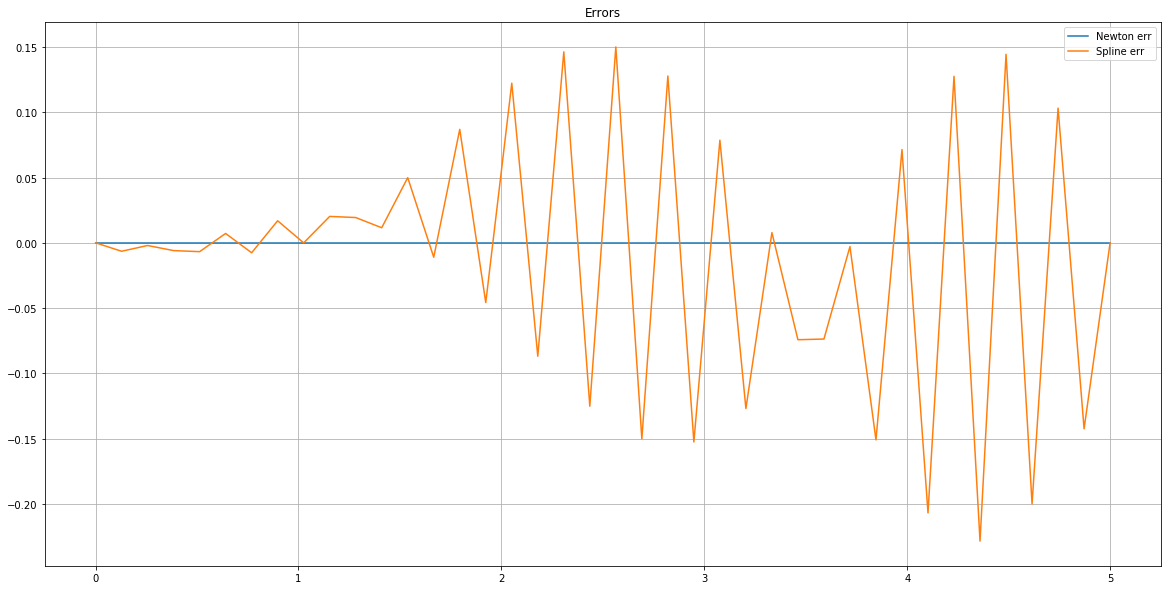

In [16]:
#Построим ошибки на узлах
plt.figure(figsize=(20,10))
plt.title('Errors')
plt.grid()
plt.plot(x_test,dis_new, label = 'Newton err')
plt.plot(x_test,dis_spline, label = 'Spline err');
plt.legend();
#Видим, что на сплайнах ошибка больше, чем на ньютоне

### PS Для интереса посмоотрим на эффект Рунге

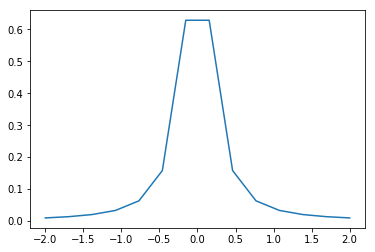

In [17]:
def Runge_phen(x):
    return 1/ (1 + 25 * x**2)
size = 14
x_Runge = np.linspace(-2, 2, size)
y_Runge = Runge_phen(x_Runge)
plt.plot(x_Runge, y_Runge);

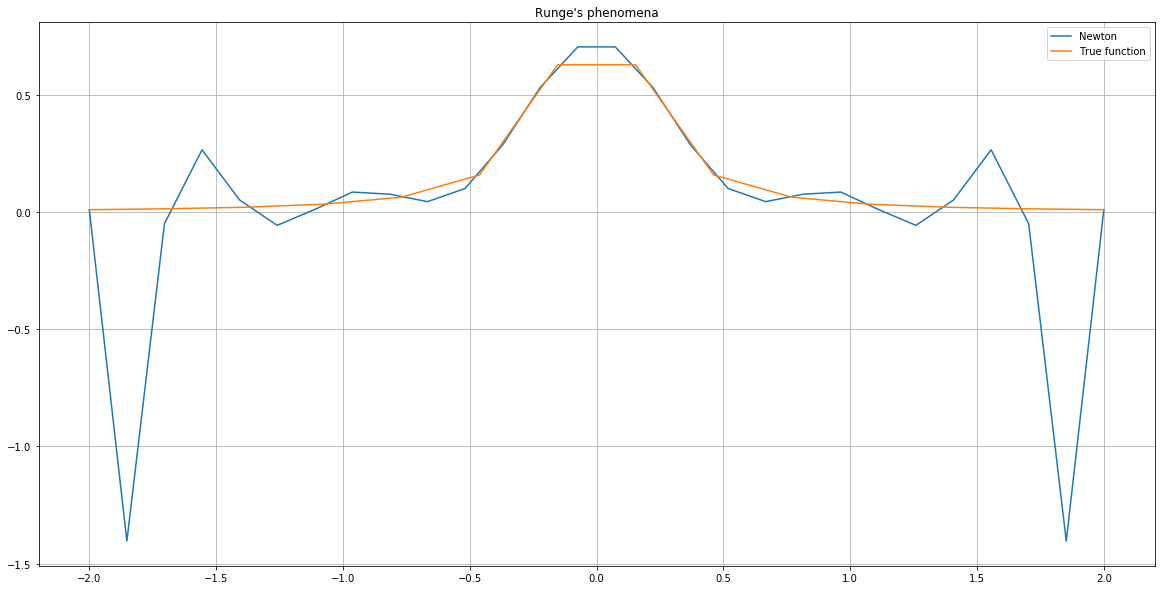

In [18]:
x_test = np.linspace(-2,2, 2*size)
solver_Runge = Newton_polynom_solver(x_Runge, y_Runge)
y_test = solver_Runge.solve(x_test)
plt.figure(figsize=(20,10))
plt.title("Runge's phenomena")
plt.grid()
plt.plot(x_test,y_test, label = 'Newton ')
plt.plot(x_Runge, y_Runge, label = 'True function');
plt.legend();